In [416]:
# Declare libraries that will be used in the spreading fire project (ada beda)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import *
from random import *

In [417]:
# Declare global variable that will be used in some functions
global TREE, BURNING
TREE = 1
BURNING = 2

In [418]:
# Define function to initialize forest (ada beda)
def initForest(n):
    forest = np.full((n, n), TREE)  # Inisialisasi semua sel sebagai pohon
    middle = n // 2
    forest[middle, middle] = BURNING  # Hanya satu pohon yang terbakar di tengah
    return forest

In [419]:
# Define function to visualize the grid that represents the forest with RGB colour
def makeColorGrid(grid):
    n = grid.shape[0]
    colorGrid = np.zeros((n, n, 3))
    colorGrid[:, :, 0] = 1
    colorGrid[:, :, 1] = 1
    for i in range(0, n):
        for j in range(0, n):
            if (grid[i, j] == TREE):
                colorGrid[i, j, 0] = 0.1
                colorGrid[i, j, 1] = 0.75
                colorGrid[i, j, 2] = 0.02
            if (grid[i, j] == BURNING):
                colorGrid[i, j, 0] = 0.6
                colorGrid[i, j, 1] = 0.2
                colorGrid[i, j, 2] = 0.1
    return colorGrid

In [420]:
# Define function to widden the grid that represents the forest
def reflectingLat(lat):
    latNS = np.row_stack((lat[-1], lat, lat[0]))
    return np.column_stack((latNS[:,-1], latNS, latNS[:,0]))

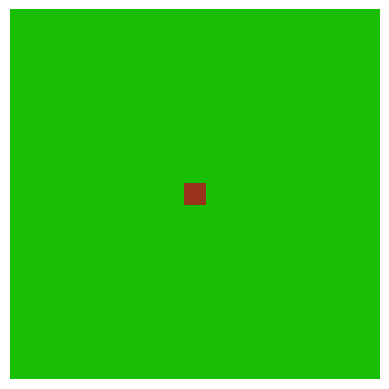

In [421]:
# Define function to visualize forest with matplotlib (ada beda)
fig = plt.figure()
plt.axis('off')
n = 17
im = plt.imshow(makeColorGrid(initForest(n)))

In [422]:
# Define function to state a situation of a cell based on its surrounding (ada beda)
def spread(site, N, E, S, W, burnProbability):
    newSite = site
    if site == TREE and (N == BURNING or E == BURNING or S == BURNING or W == BURNING):
        if random() < burnProbability:
          newSite = BURNING
        else:
          newSite = TREE
    return newSite

In [423]:
# Define function to apply the rules of burn on the widder grid
def applyExtended(latExt, burnProbability):
    n = latExt.shape[0] - 2
    newLat = np.zeros((n, n))

    for i in range(1, n + 1):
        for j in range(1, n + 1):
            site = latExt[i, j]
            N = latExt[i - 1, j]
            E = latExt[i, j + 1]
            S = latExt[i + 1, j]
            W = latExt[i, j - 1]
            newLat[i - 1, j - 1] = spread(site, N, E, S, W, burnProbability)
    return newLat

In [424]:
# Define function to simulate of the burning forest
def fire(n, burnProbability, t):
    forest  = initForest(n)

    # Perform simulation
    grids = np.zeros((t + 1, n, n))
    grids[0, :, :] = forest
    for i in range(1, t + 1):
        forestExtended = reflectingLat(forest)
        forest = applyExtended(forestExtended, burnProbability)
        grids[i, :, :] = forest
    return grids[t]

In [425]:
# Define function to calculate the percentage of the trees burning in the forest
def percentBurn(grid):
    n = grid.shape[0]
    count = 0
    for i in range(0, n):
      for j in range(0, n):
        if (grid[i][j] == 2):
          count += 1
    percent = count / (n * n)
    print("Presentase hutan yang terbakar: {:.5f}%".format(percent))
    return percent * 100

Presentase hutan yang terbakar: 0.03806%
Presentase hutan yang terbakar: 0.03114%
Presentase hutan yang terbakar: 0.02422%
Presentase hutan yang terbakar: 0.02422%
Presentase hutan yang terbakar: 0.04498%
Presentase hutan yang terbakar: 0.05536%
Presentase hutan yang terbakar: 0.01730%
Presentase hutan yang terbakar: 0.01384%
Presentase hutan yang terbakar: 0.03806%
Presentase hutan yang terbakar: 0.02076%
Presentase hutan yang terbakar: 0.10727%
Presentase hutan yang terbakar: 0.12111%
Presentase hutan yang terbakar: 0.14187%
Presentase hutan yang terbakar: 0.09343%
Presentase hutan yang terbakar: 0.03460%
Presentase hutan yang terbakar: 0.08651%
Presentase hutan yang terbakar: 0.12111%
Presentase hutan yang terbakar: 0.10381%
Presentase hutan yang terbakar: 0.10727%
Presentase hutan yang terbakar: 0.04498%
Presentase hutan yang terbakar: 0.17301%
Presentase hutan yang terbakar: 0.20069%
Presentase hutan yang terbakar: 0.18685%
Presentase hutan yang terbakar: 0.15917%
Presentase hutan

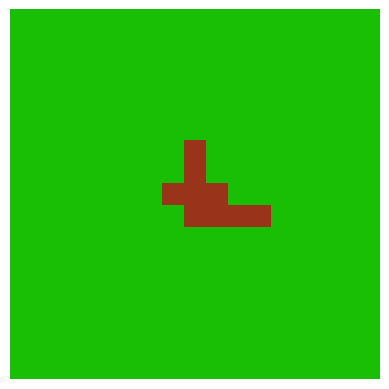

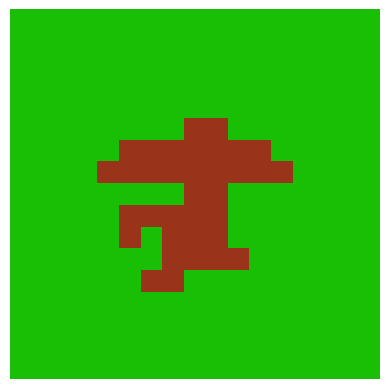

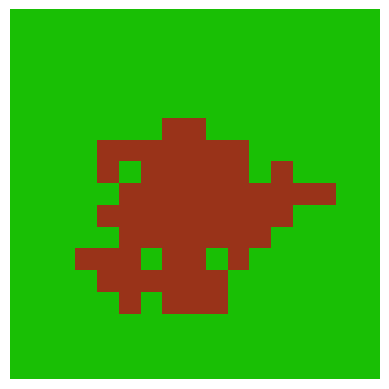

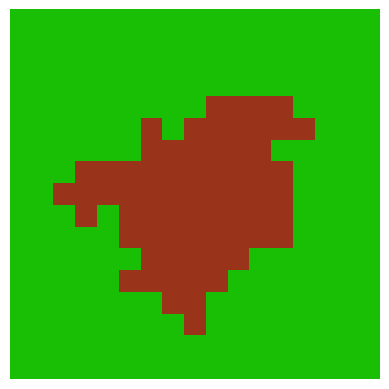

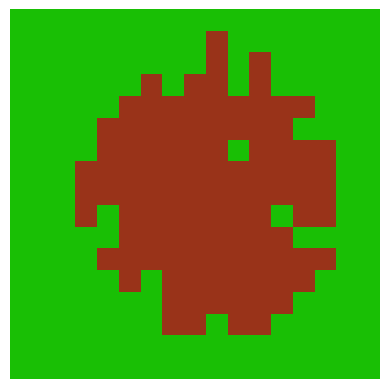

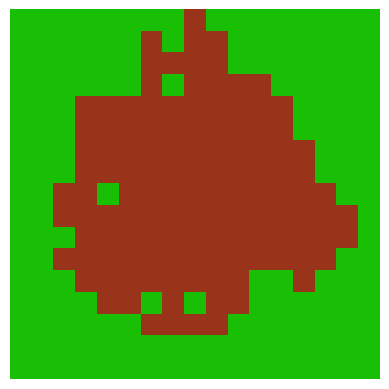

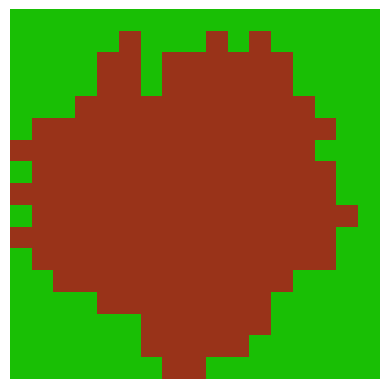

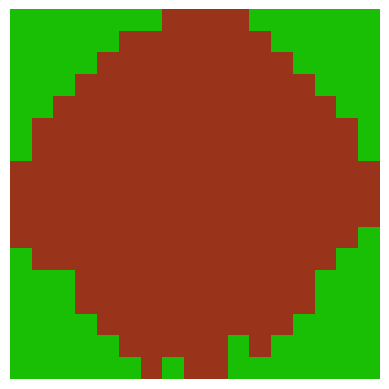

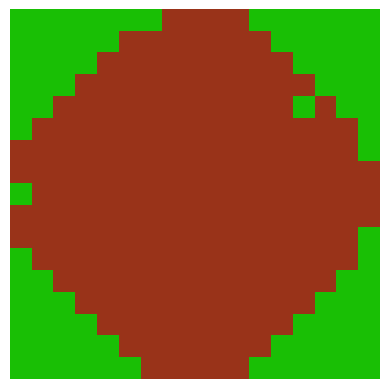

In [426]:
# Define function to do several experiments of the burning forest to get an average percentage of the burning forest
def experiment(n):
    average_list = []
    for i in range(1, 10):
      percent_total = 0
      for j in range(n):
        grid = fire(17, i/10, 10)
        if (j == 1):
          fig = plt.figure()
          plt.axis('off')
          im = plt.imshow(makeColorGrid(grid))
        percent_total += percentBurn(grid)
        # average_percent = percent_total / n
      average_list.append(percent_total / 10)
    return average_list

# Define function to display the result of the experiment with the probability from 0.1 to 0.9
result = experiment(10)
prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


9
9


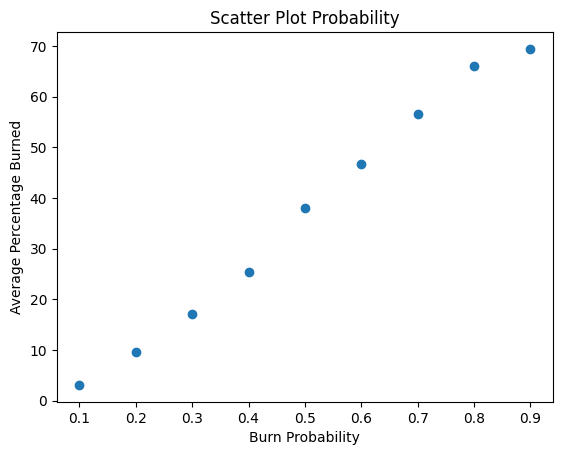

In [427]:
print(len(prob))  # Untuk memeriksa panjang prob
print(len(result))  # Untuk memeriksa panjang result

# Plotting the scatter plot
plt.scatter(prob, result)

# Adding labels and title
plt.xlabel('Burn Probability')
plt.ylabel('Average Percentage Burned')
plt.title('Scatter Plot Probability')

# Display the plot
plt.show()

In [428]:
for prob_value, average_list in zip(prob, result):
    print("Probabilitas: {} - Rata-rata Presentase Terbakar: {:.5f} %".format(prob_value, average_list/100))

Probabilitas: 0.1 - Rata-rata Presentase Terbakar: 0.03080 %
Probabilitas: 0.2 - Rata-rata Presentase Terbakar: 0.09619 %
Probabilitas: 0.3 - Rata-rata Presentase Terbakar: 0.17128 %
Probabilitas: 0.4 - Rata-rata Presentase Terbakar: 0.25398 %
Probabilitas: 0.5 - Rata-rata Presentase Terbakar: 0.38062 %
Probabilitas: 0.6 - Rata-rata Presentase Terbakar: 0.46713 %
Probabilitas: 0.7 - Rata-rata Presentase Terbakar: 0.56574 %
Probabilitas: 0.8 - Rata-rata Presentase Terbakar: 0.66090 %
Probabilitas: 0.9 - Rata-rata Presentase Terbakar: 0.69412 %
